# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
<!-- ![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [55]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [56]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [57]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rdkulkarni"
kaggle_key = "31afc15c06f7c06ea93281ff7d35d208"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [58]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [59]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [60]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
#train = pd.read_csv("train.csv")
#train['datetime'] = pd.to_datetime(train['datetime'])
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.dtypes
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [61]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [62]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [63]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [64]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission['datetime'] = pd.to_datetime(submission['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [65]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data = train.drop(["casual","registered"], axis=1), time_limit=300, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_205315/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20230531_205315/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [66]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.155403      13.235690  287.474802                0.000743           0.242351            3       True         12
1   RandomForestMSE_BAG_L2  -53.448098       9.608374  210.058853                0.704323          28.346006            2       True         11
2          LightGBM_BAG_L2  -55.155439       9.204641  206.410891                0.300590          24.698044            2       True         10
3        LightGBMXT_BAG_L2  -60.522579      12.230035  234.188401                3.325984          52.475555            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.073659    0.064165                0.073659           0.064165            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.074150    0.354374         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.12196294993845,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [67]:
predictions = predictor.predict(test)
predictions.head()

0    23.321266
1    42.726982
2    45.585411
3    49.228256
4    51.830727
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [68]:
# Describe the `predictions` series to see if there are any negative values
predictions[predictions < 0].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: count, dtype: float64

In [69]:
# How many negative values do we have?
?

In [70]:
# Set them to zero
?

### Set predictions to submission dataframe, save, and submit

In [71]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [72]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 96.3kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [73]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-31 20:59:16  first raw submission               complete  1.80433      1.80433       
submission_new_features.csv  2023-05-31 20:52:14  new features                       complete  1.29651      1.29651       
submission.csv               2023-05-31 20:51:47  first raw submission               complete  1.80188      1.80188       
submission_new_hpo.csv       2023-05-23 06:25:02  new features with hyperparameters  complete  1.30813      1.30813       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

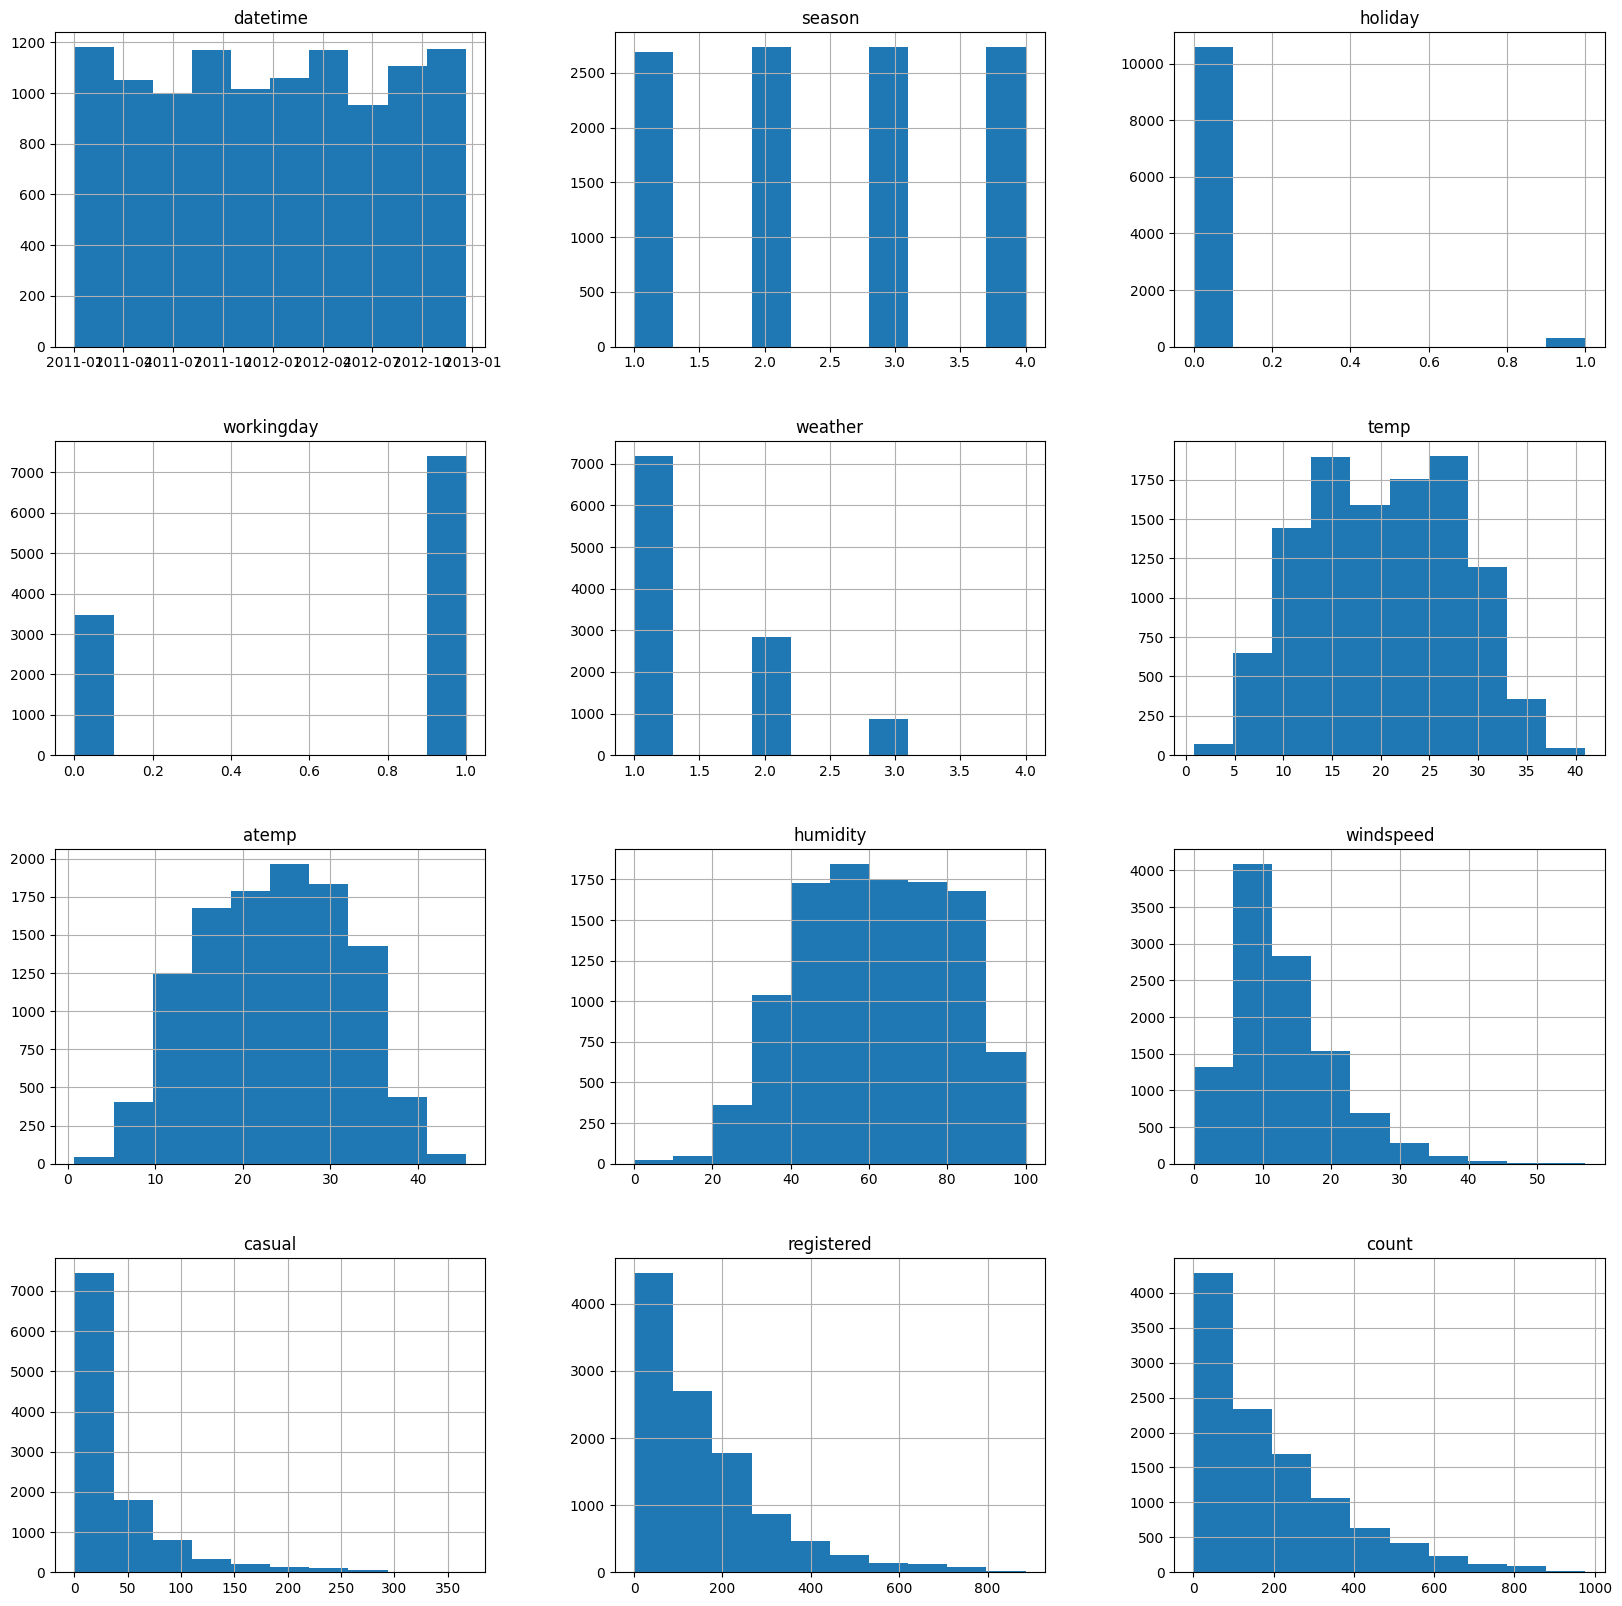

In [74]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
#train.hist()
train.hist(figsize=(20,20));

In [75]:
# create a new feature
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.day
train['year'] = train['datetime'].dt.year
test['month'] = train['datetime'].dt.month
test['date'] = train['datetime'].dt.day
test['year'] = train['datetime'].dt.year
train = train.drop(['datetime'], axis = 1)
test = test.drop(['datetime'], axis = 1)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [76]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["season"].astype('category')

In [77]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011


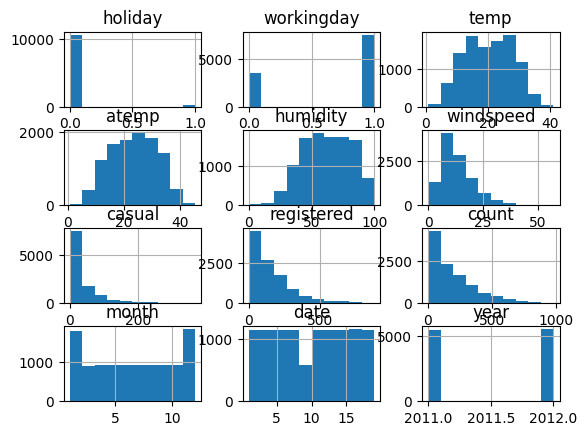

In [78]:
# View histogram of all features again now with the hour feature
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [79]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data = train.drop(["casual","registered"], axis=1), time_limit=300, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_205921/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20230531_205921/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [80]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -127.288228       7.068047  281.291804                0.001242           0.326737            3       True         12
1        LightGBMXT_BAG_L2 -127.717719       6.203900  209.404520                0.153607          22.707056            2       True          8
2          CatBoost_BAG_L2 -127.937763       6.291424  212.362437                0.241130          25.664972            2       True         11
3          LightGBM_BAG_L2 -127.973518       6.155206  208.393565                0.104913          21.696100            2       True          9
4      WeightedEnsemble_L2 -128.376689       5.238719  149.144876                0.000960           0.425287            2       True          7
5   RandomForestMSE_BAG_L2 -129.491351       6.567155  210.896939         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -154.03108914279713,
  'KNeighborsDist_BAG_L1': -154.18336588381544,
  'LightGBMXT_BAG_L1': -131.41684241969176,
  'LightGBM_BAG_L1': -132.7412794107411,
  'RandomForestMSE_BAG_L1': -131.4598601217315,
  'CatBoost_BAG_L1': -134.72004204266298,
  'WeightedEnsemble_L2': -128.37668896775395,
  'LightGBMXT_BAG_

In [81]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    87.385117
1    72.972466
2    72.972466
3    76.945587
4    76.945587
Name: count, dtype: float32

In [82]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: count, dtype: float64

In [83]:
# Same submitting predictions
submission["count"] = predictions_new_features
submission.to_csv("submission_new_features.csv", index=False)

In [84]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 97.2kB/s]
Successfully submitted to Bike Sharing Demand

In [85]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-31 21:04:59  new features                       complete  1.30392      1.30392       
submission.csv               2023-05-31 20:59:16  first raw submission               complete  1.80433      1.80433       
submission_new_features.csv  2023-05-31 20:52:14  new features                       complete  1.29651      1.29651       
submission.csv               2023-05-31 20:51:47  first raw submission               complete  1.80188      1.80188       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [91]:
# from autogluon.tabular import TabularDataset, TabularPredictor
# from autogluon.core.scheduler import HyperbandScheduler
# scheduler = HyperbandScheduler(
#     time_attr='epoch',
#     max_t=100,
#     grace_period=10,
#     reduction_factor=3,
#     brackets=3)

ImportError: ignored

In [94]:
import autogluon.core as ag
scheduler = ag.scheduler.HyperbandScheduler(
    train_fn,
    resource={'num_cpus': 2, 'num_gpus': 0},
    num_trials=100,
    reward_attr='accuracy',
    time_attr='epoch',
    grace_period=1,
    reduction_factor=3,
    type='stopping')

In [93]:
hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'search_strategy': 'random'
}
hyperparameters = {'GBM': {'num_boost_round': 1000},
                    'NN': {'num_epochs': 10},
                    'CAT': {'iterations': 100}}
predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(train_data = train.drop(["casual","registered"], axis=1), time_limit =120, hyperparameter_tune_kwargs = hyperparameter_tune_kwargs, hyperparameters = hyperparameters)





No path specified. Models will be saved in: "AutogluonModels/ag-20230531_211543/"
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20230531_211543/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11177.17 MB
	Train Data (Original)  Memory Usage: 0.81 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGen

ValueError: ignored

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge   0.462394       0.059599  2.184146                0.059599           2.184146            1       True          1
1  WeightedEnsemble_L2   0.462394       0.060267  2.188875                0.000668           0.004729            2       True          2
Number of models trained: 2
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])  : 2 | ['season', 'weather']
('float', [])     : 3 | ['temp', 'atemp', 'windspeed']
('int', [])       : 3 | ['humidity', 'month', 'date']
('int', ['bool']) : 3 | ['holiday', 'workingday', 'year']
*** End of fit() summary ***


/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge': 0.462394448004555,
  'WeightedEnsemble_L2': 0.462394448004555},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge': 'AutogluonModels/ag-20230523_062457/models/LightGBMLarge/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230523_062457/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'LightGBMLarge': 2.1841461658477783,
  'WeightedEnsemble_L2': 0.004729032516479492},
 'model_pred_times': {'LightGBMLarge': 0.05959916114807129,
  'WeightedEnsemble_L2': 0.000667572021484375},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBMLarge': {'learning_rate': 0.03,
   'num_leaves': 128,
   'feature_fraction': 0.9,
   'min_data_in_leaf': 5},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}},
 'leaderboard':                  

In [ ]:
# Remember to set all negative values to zero
?

In [ ]:
# Same submitting predictions
predictions_new_hpo = predictor_new_hpo.predict(test)
submission["count"] = predictions_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 164kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-23 06:25:02  new features with hyperparameters  complete  1.30813      1.30813       
submission_new_features.csv  2023-05-23 06:24:55  new features                       complete  1.29514      1.29514       
submission.csv               2023-05-23 06:13:45  first raw submission               complete  1.80363      1.80363       
submission_new_hpo.csv       2023-05-19 23:45:16  new features with hyperparameters  complete  1.30813      1.30813       


#### New Score of `?`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-23 06:25:02  new features with hyperparameters  complete  1.30813      1.30813       
submission_new_features.csv  2023-05-23 06:24:55  new features                       complete  1.29514      1.29514       
submission.csv               2023-05-23 06:13:45  first raw submission               complete  1.80363      1.80363       
submission_new_hpo.csv       2023-05-19 23:45:16  new features with hyperparameters  complete  1.30813      1.30813       
submission_new_features.csv  2023-05-19 22:40:45  new features                       complete  1.29553      1.29553       
submission.csv               2023-05-19 21:33:46  first raw submission               complete  1.79951      1.79951       
submission.csv  

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

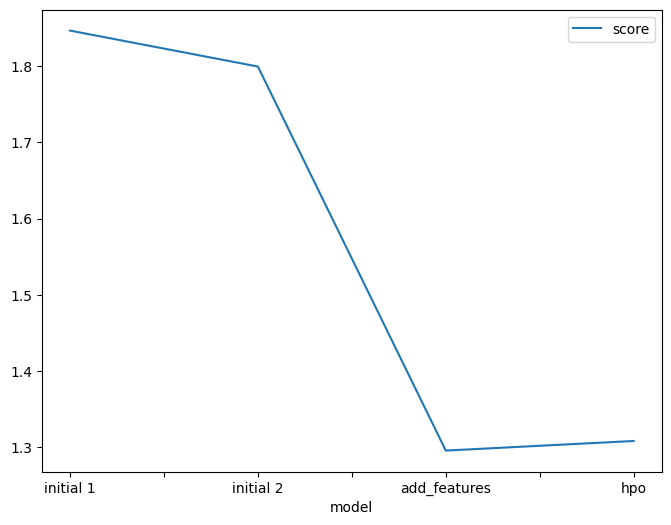

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial 1", "initial 2", "add_features", "hpo"],
        "score": [1.84672, 1.79951, 1.29553, 1.30813]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

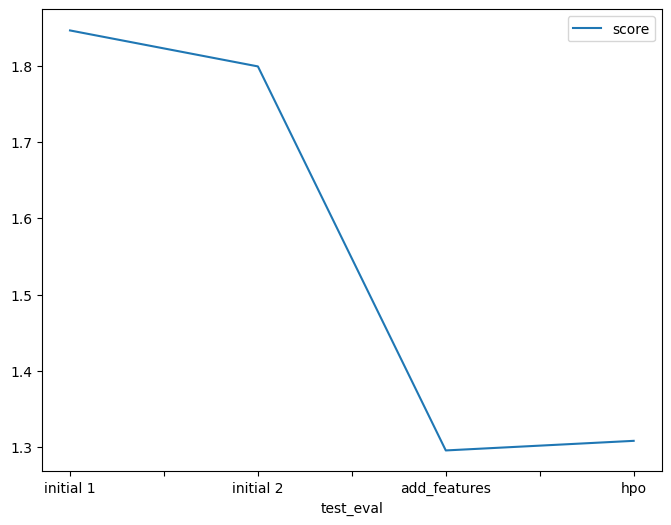

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial 1","initial 2", "add_features", "hpo"],
        "score": [1.84672, 1.79951, 1.29553, 1.30813]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial 1", "initial 2", "add_features", "hpo"],
    "hpo1": ["month", "month","month","month"],
    "hpo2": ["date", "date","date","date"],
    "hpo3": ["year", "year","year","year"],
    "score": [1.84672, 1.79951, 1.29553, 1.30813]
})

,model,hpo1,hpo2,hpo3,score
0,initial 1,month,date,year,1.84672
1,initial 2,month,date,year,1.79951
2,add_features,month,date,year,1.29553
3,hpo,month,date,year,1.30813
